# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

57436


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [2]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [3]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'nucleus_and_chromosome')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\nucleus_and_chromosome\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\nucleus_and_chromosome\figures.


# Plotting parameters

In [4]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [5]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [6]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [7]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [8]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load nuclear size

Below nuclear volume data can be generated by the notebook below:

[2_nuclei_size_by_convexhull_singlecell_dataframe](2_nuclei_size_by_convexhull_singlecell_dataframe.ipynb)

In [10]:
nuc_volume_fname = os.path.join(output_analysis_folder, f'nucleus_volume_convexhull_bysubclass.csv')

nuc_volume_df = pd.read_csv(nuc_volume_fname, index_col=0)
nuc_volume_df.head()

,subclass,nucleus_volume,total_spots
uid,,,
259202492748634617304623818845147108919,Oligo,255.043678,863
336074706103419484501535095917410831417,Oligo,298.589934,1426
179117357717369278884189379535888871018,Oligo,305.797609,1601
36321914521561890358202806077673807953,Oligo,76.777445,210
92271180002801802991585284299263797402,Oligo,376.983590,2034


# Load chromatin size dataframe

Data below can be generated using the notebook as:

[4_1_calculate_chromatin_rg](./4_1_calculate_chromatin_rg.ipynb)

In [11]:
df_rg_filename = os.path.join(output_analysis_folder, 'WT_MOp_Rg.csv')

if os.path.exists(df_rg_filename):
    chromosome_size_df = pd.read_csv(df_rg_filename, index_col=0)

In [12]:
chromosome_size_df.head()

,rg,uid,majorType,subclass,chr,fiberidx
0,1.241714,100002611273212566104762860093574587628,Gluta,L4/5 IT,chr1,1
1,1.163226,100002611273212566104762860093574587628,Gluta,L4/5 IT,chr10,1
2,1.888276,100002611273212566104762860093574587628,Gluta,L4/5 IT,chr11,1
3,1.759560,100002611273212566104762860093574587628,Gluta,L4/5 IT,chr12,1
4,1.404082,100002611273212566104762860093574587628,Gluta,L4/5 IT,chr13,1


# Correlate nuclear size and chromosome size

In [13]:
min_pts_th = 1250
df_plot = nuc_volume_df[nuc_volume_df['total_spots']>min_pts_th]
df_plot_median = pd.DataFrame(df_plot.groupby(by='subclass')['nucleus_volume'].median())
# add chromosome size by celltype
df_plot_median['chromosome_size'] = chromosome_size_df.groupby(by='subclass')['rg'].median()
df_plot_median['celltype'] = df_plot_median.index
df_plot_median

,nucleus_volume,chromosome_size,celltype
subclass,,,
Astro,285.322546,1.309265,Astro
Endo,217.164786,1.230019,Endo
L2/3 IT,465.983908,1.446868,L2/3 IT
L4/5 IT,397.141421,1.382461,L4/5 IT
L5 ET,585.822123,1.641963,L5 ET
L5 IT,484.328127,1.507216,L5 IT
L5/6 NP,409.405376,1.424335,L5/6 NP
L6 CT,416.260699,1.367400,L6 CT
L6 IT,452.559266,1.402383,L6 IT


meta NOT subset; don't know how to subset; dropped


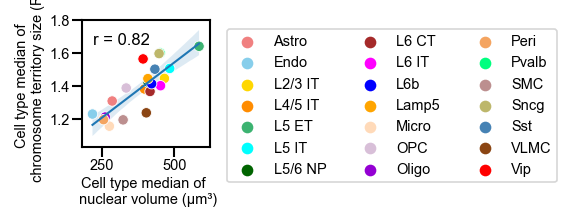

In [14]:
# plot
%matplotlib inline

fig, ax = plt.subplots(figsize=(_page_width/5,_page_width/5),dpi=150)

x_col = 'nucleus_volume'
y_col = 'chromosome_size'


gfg = sns.regplot(data=df_plot_median, x= x_col, y = y_col, ax=ax,
                  ci=95,scatter=False,
                  line_kws={'linewidth':1}
                 )
gfg = sns.scatterplot(data=df_plot_median, 
                      x= x_col, y = y_col, ax=ax,
                        #legend='full',
                        hue ='celltype',
                      #linewidth = 0,
                        palette=celltype_palette,
                        s=25,
                   )

plt.legend(bbox_to_anchor=(1.02, 1.04), loc='upper left', ncols=3, borderaxespad=1,fontsize=_font_size)
#ax.text(220,1.6,f'r\u00b2 = {round(reg.score(X, y),2)}',fontsize=_font_size)

from scipy.stats import pearsonr
r_val = pearsonr(df_plot_median[x_col].values, df_plot_median[y_col].values)[0]
ax.text(220,1.65,f'r = {round(r_val,2)}',fontsize=_font_size+1)


ax.tick_params('x', labelsize=_font_size, 
                    #width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelbottom=True) # remove bottom ticklabels for _ax
ax.tick_params('y', labelsize=_font_size, 
                #width=_ticklabel_width, #length=0,
                pad=1, labelleft=True)

#ax.set_xlabel(f'nucleus size -median', fontsize=_font_size, labelpad=5)
ax.set_xlabel('Cell type median of \n nuclear volume (\u03bcm\u00b3)',fontsize=_font_size,labelpad=2)
ax.set_ylabel(f'Cell type median of \n chromosome territory size (Rg)', fontsize=_font_size, labelpad=2)


ax.grid(False)
ax.margins(0.1)

plt.savefig(os.path.join(output_figure_folder, f'corr_nuclear_size_and_chrom_size.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

plt.show()
    

# Load RNA from snRNAseq

In [15]:
import scanpy as sc
sn_RNA_folder = r'L:\Shiwei\DNA_MERFISH_analysis\10x_nuclei_v3_MOp_AIBS\Analysis_10X_nuclei_v3_AIBS\processed'
sn_adata = sc.read(os.path.join(sn_RNA_folder,r'MOp_10x_sn_filtered_unnorm_w_label.h5ad'))
sn_adata

AnnData object with n_obs × n_vars = 40166 × 25644
    obs: 'aggr_num', 'umi.counts', 'gene.counts', 'library_id', 'tube_barcode', 'Seq_batch', 'Region', 'Lib_type', 'Gender', 'Donor', 'Amp_Name', 'Amp_Date', 'Amp_PCR_cyles', 'Lib_Name', 'Lib_Date', 'Replicate_Lib', 'Lib_PCR_cycles', 'Lib_PassFail', 'Cell_Capture', 'Lib_Cells', 'Mean_Reads_perCell', 'Median_Genes_perCell', 'Median_UMI_perCell', 'Saturation', 'Live_percent', 'Total_Cells', 'Live_Cells', 'method', 'exp_component_name', 'mapped_reads', 'unmapped_reads', 'nonconf_mapped_reads', 'total.reads', 'doublet.score', 'subclass_label', 'class_label', 'cluster_label', 'cluster_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'neuron_identity', 'class_label_new', 'subclass_label_new'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_

## transcripts' genomic information

Example table can be found as:

[MOp_10x_snRNA_chr_info_NEW_from_transcriptome_FORMAT](../../external/resources/MOp_10x_snRNA_chr_info_NEW_from_transcriptome_FORMAT.csv)

In [16]:
# a curated file containing the genomic coordinate info for all transcripts
clean_gene_df =pd.read_csv(os.path.join(sn_RNA_folder, "MOp_10x_snRNA_chr_info_NEW_from_transcriptome_FORMAT.csv"), index_col=0)
clean_gene_df.head()

,chr,start,end,gene_biotype,coding_strand,length,genomic_position
gene,,,,,,,
Xkr4,1,3205901,3671498,protein_coding,-1,465597,chr1_3205901_3671498
Gm1992,1,3466587,3513553,antisense,1,46966,chr1_3466587_3513553
Gm37381,1,3905739,3986215,lincRNA,-1,80476,chr1_3905739_3986215
Rp1,1,3999557,4409241,protein_coding,-1,409684,chr1_3999557_4409241
Sox17,1,4490931,4497354,protein_coding,-1,6423,chr1_4490931_4497354


In [17]:
# filter adata with known chromosome information
sn_adata.var[clean_gene_df.columns]=clean_gene_df
chrom_list = [c for c in np.unique(codebook_df['chr']) if c!= 'Y']
chrom_list = [c for c in chrom_list  if c!='X']
chrom_list.sort(key = int)
chrom_list.append('X')
filtered_adata = sn_adata[:,sn_adata.var['chr'].isin(chrom_list)]

## summarize RNA level by chromosome

In [19]:
groupby = 'subclass_label_new'

expression_chr_dict = {'celltype':[], 'chr':[], 
                       'chromosome_expression':[],
                       #'chromosome_mean_expression':[],
                      }

import tqdm
for sel_chrom in tqdm.tqdm(chrom_list):
    sel_chrom = f'chr{sel_chrom}'

    for sel_celltype in np.unique(chromosome_size_df['subclass'].tolist())[:]:
        sel_adata = filtered_adata[filtered_adata.obs[groupby]==sel_celltype]
        sel_adata_chr = sel_adata[:, sel_adata.var['chr']==sel_chrom.split('chr')[1]]

        expression_celltype = np.nanmedian(np.sum(sel_adata_chr.X.toarray(),axis=1))
        #mean_expression_celltype = np.nanmedian(np.mean(sel_adata_chr.X.toarray(),axis=1))

        expression_chr_dict['celltype'].append(sel_celltype)
        expression_chr_dict['chr'].append(sel_chrom)

        expression_chr_dict['chromosome_expression'].append(expression_celltype)
        #expression_chr_dict['chromosome_mean_expression'].append(mean_expression_celltype)
    
expression_chr_df = pd.DataFrame(expression_chr_dict)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:43<00:00,  2.17s/it]


In [20]:
expression_chr_df.head()

,celltype,chr,chromosome_expression
0,Astro,chr1,314.0
1,Endo,chr1,224.0
2,L2/3 IT,chr1,1037.0
3,L4/5 IT,chr1,860.5
4,L5 ET,chr1,1477.0


# Correlate chromosome size and chromosomal RNA

In [29]:
chrom_size_df_median = pd.DataFrame(chromosome_size_df.groupby(by=['chr','subclass'])['rg'].median()).reset_index()
chrom_size_df_median.head()

,chr,subclass,rg
0,chr1,Astro,1.427638
1,chr1,Endo,1.391142
2,chr1,L2/3 IT,1.565562
3,chr1,L4/5 IT,1.472721
4,chr1,L5 ET,1.824113


In [30]:
    
rna_total_byChr_byCelltype_map_dict = {(_cell, _chr):v for _cell, _chr, v in zip(expression_chr_df['celltype'],
                                                                           expression_chr_df['chr'],
                                                                           expression_chr_df['chromosome_expression'])}


def rna_total_byChr_byCelltype_map (_celltype, _chr, rna_total_byChr_byCelltype_map_dict=rna_total_byChr_byCelltype_map_dict):
    return rna_total_byChr_byCelltype_map_dict[(_celltype, _chr)]


df_plot = chrom_size_df_median.copy(deep=True)
df_plot['rna_total'] = df_plot.apply(lambda row: rna_total_byChr_byCelltype_map(row['subclass'], 
                                                                                row['chr']), axis=1)

df_plot.head()

,chr,subclass,rg,rna_total
0,chr1,Astro,1.427638,314.0
1,chr1,Endo,1.391142,224.0
2,chr1,L2/3 IT,1.565562,1037.0
3,chr1,L4/5 IT,1.472721,860.5
4,chr1,L5 ET,1.824113,1477.0


## plot scatter figures across all cell types

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]meta NOT subset; don't know how to subset; dropped


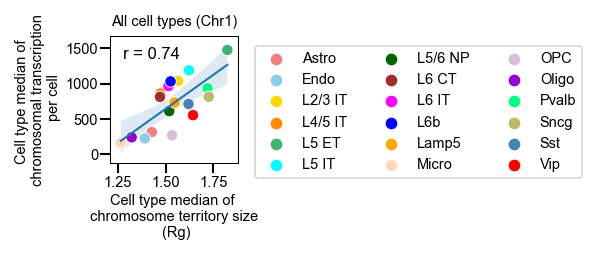

 33%|████████████████████████████                                                        | 1/3 [00:01<00:03,  1.88s/it]meta NOT subset; don't know how to subset; dropped


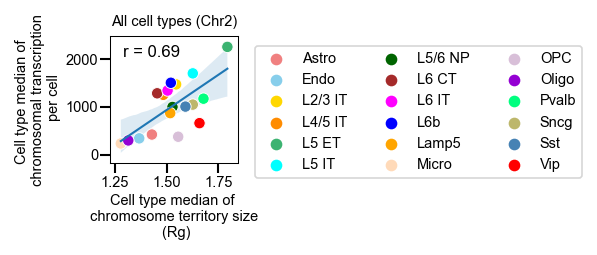

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:03<00:01,  1.87s/it]meta NOT subset; don't know how to subset; dropped


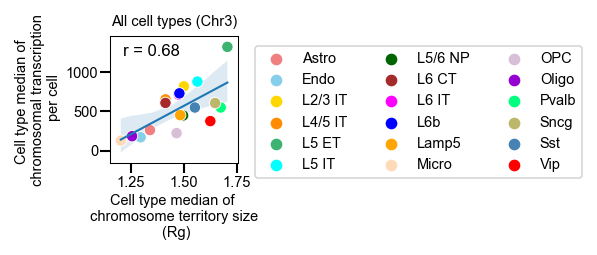

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.82s/it]


In [34]:
%matplotlib inline
import seaborn as sns

x_col = 'rg'
y_col='rna_total'


sel_chrom_list = ['1','2','3']
for sel_chrom in tqdm.tqdm(sel_chrom_list):
    sel_chrom = f'chr{sel_chrom}'
    sel_df_plot = df_plot[df_plot['chr']==sel_chrom]
    sel_df_plot =sel_df_plot.dropna()
    fig, ax = plt.subplots(figsize=(_page_width/5,_page_width/5),dpi=150)
    
    gfg = sns.regplot(data=sel_df_plot, x= x_col, y=y_col, ax=ax, ci=95,
                  line_kws={'linewidth':1},scatter=False,
                 )
    sns.scatterplot(ax=ax, data=sel_df_plot, x=x_col,y=y_col,
                        hue='subclass', legend = 'brief', palette=celltype_palette,
                    s=30)
    ax.set_title(f'{sel_chrom}',fontsize=_font_size)


    from scipy.stats import pearsonr
    r_val = pearsonr(sel_df_plot[x_col].values, sel_df_plot[y_col].values)[0]
    rPlot_x,rPlot_y = np.nanmin(sel_df_plot[x_col])*1.01, np.nanmax(sel_df_plot[y_col])*.91
    ax.text(rPlot_x,rPlot_y,f'r = {round(r_val,2)}',fontsize=_font_size+1)

    
    plt.legend(bbox_to_anchor=(1.02, 1.04), loc='upper left', borderaxespad=1,fontsize=_font_size,ncols=3)
    ax.set_ylabel('Cell type median of \n chromosomal transcription \n per cell',fontsize=_font_size,labelpad=2)
    ax.set_xlabel(f'Cell type median of \n chromosome territory size \n (Rg)', fontsize=_font_size, labelpad=2)
    
    ax.set_title(f'All cell types ({sel_chrom.capitalize()})',fontsize=_font_size,pad=5)
    
    ax.tick_params('x', labelsize=_font_size, 
                    #width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelbottom=True) # remove bottom ticklabels for _ax
    ax.tick_params('y', labelsize=_font_size, 
                #width=_ticklabel_width, #length=0,
                pad=1, labelleft=True)

    plt.savefig(os.path.join(output_figure_folder, f'corr_chrom_rg_and_RNA_for_chr{sel_chrom}.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')
    
    ax.margins(0.1)
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]


    #plt.tight_layout()
    plt.show()

## plot scatter figures across excitatory neurons

In [35]:
Gluta_list = ['L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b',]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]meta NOT subset; don't know how to subset; dropped


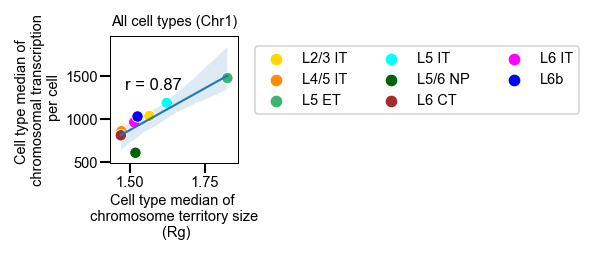

 33%|████████████████████████████                                                        | 1/3 [00:01<00:02,  1.11s/it]meta NOT subset; don't know how to subset; dropped


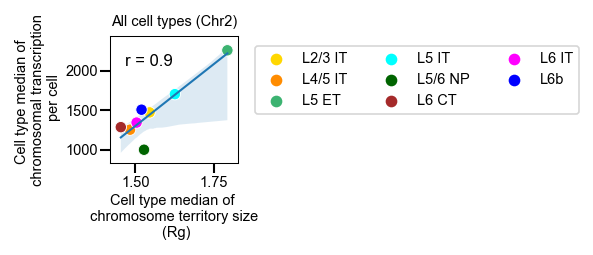

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:02<00:01,  1.20s/it]meta NOT subset; don't know how to subset; dropped


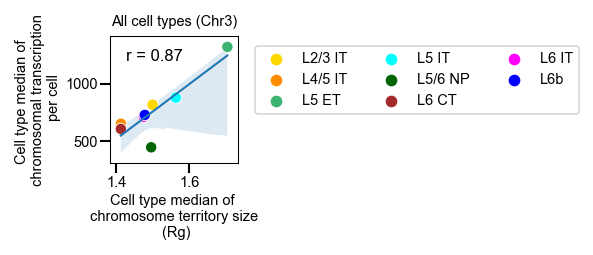

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.16s/it]


In [36]:
%matplotlib inline
import seaborn as sns

x_col = 'rg'
y_col='rna_total'


sel_chrom_list = ['1','2','3']
for sel_chrom in tqdm.tqdm(sel_chrom_list):
    sel_chrom = f'chr{sel_chrom}'
    sel_df_plot = df_plot[df_plot['chr']==sel_chrom]
    sel_df_plot =sel_df_plot.dropna()
    
    # subset for Exc.neurons only
    sel_df_plot = sel_df_plot [sel_df_plot ['subclass'].isin(Gluta_list)].copy(deep=True)
    
    fig, ax = plt.subplots(figsize=(_page_width/5,_page_width/5),dpi=150)
    
    gfg = sns.regplot(data=sel_df_plot, x= x_col, y=y_col, ax=ax, ci=95,
                  line_kws={'linewidth':1},scatter=False,
                 )
    sns.scatterplot(ax=ax, data=sel_df_plot, x=x_col,y=y_col,
                        hue='subclass', legend = 'brief', palette=celltype_palette,
                    s=30)
    ax.set_title(f'{sel_chrom}',fontsize=_font_size)


    from scipy.stats import pearsonr
    r_val = pearsonr(sel_df_plot[x_col].values, sel_df_plot[y_col].values)[0]
    rPlot_x,rPlot_y = np.nanmin(sel_df_plot[x_col])*1.01, np.nanmax(sel_df_plot[y_col])*.91
    ax.text(rPlot_x,rPlot_y,f'r = {round(r_val,2)}',fontsize=_font_size+1)

    
    plt.legend(bbox_to_anchor=(1.02, 1.04), loc='upper left', borderaxespad=1,fontsize=_font_size,ncols=3)
    ax.set_ylabel('Cell type median of \n chromosomal transcription \n per cell',fontsize=_font_size,labelpad=2)
    ax.set_xlabel(f'Cell type median of \n chromosome territory size \n (Rg)', fontsize=_font_size, labelpad=2)
    
    ax.set_title(f'All cell types ({sel_chrom.capitalize()})',fontsize=_font_size,pad=5)
    
    ax.tick_params('x', labelsize=_font_size, 
                    #width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelbottom=True) # remove bottom ticklabels for _ax
    ax.tick_params('y', labelsize=_font_size, 
                #width=_ticklabel_width, #length=0,
                pad=1, labelleft=True)

    plt.savefig(os.path.join(output_figure_folder, f'corr_chrom_rg_and_RNA_for_chr{sel_chrom}_Exc.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')
    
    ax.margins(0.1)
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]


    #plt.tight_layout()
    plt.show()